# Collecting data from GooglePlay

This notebook is used to collect the dataset 'reviews.csv'. You are free to modify this code and customise the dataset according to your goals.

**Note:**

This code is designed to collect almost similar number of positive and negative reviews. However, it aims to show a way of data collection, may not be case of your analysis.

The function used for scraping app info and reviews is [google-play-scraper](https://github.com/JoMingyu/google-play-scraper).

## Setup

Let's install the required packages and setup the imports:

In [1]:
# First time running this code, you need to install package 'google_play_scraper' 
#!pip install --upgrade google_play_scraper

  Created wheel for google-play-scraper: filename=google_play_scraper-0.1.2-py3-none-any.whl size=22283 sha256=6ea140fe26ab917921137b41f7356cbd4700cc0f60cecf79c0fbb9a731723508
  Stored in directory: c:\users\yusuf\appdata\local\pip\cache\wheels\7c\31\92\eae6c18272cbadda3f3b29efc9dbb1ba7d96cb92397543c3c5
Successfully built google-play-scraper


In [25]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app


Now let's create a list of Apps we want to collect.

We will need 'the Google Play ID', which is the unique identifier of an Android application. 
It can be found by searching for the app and finding the Play store web page for the app.

In the example below, the Google Play ID is ``com.amazon.mShop.android.shopping``, which you can find directly from its url address:

https://play.google.com/store/apps/details?id=com.amazon.mShop.android.shopping

You are free to define your own list of Apps.

In [26]:
# List of Apps and their packages to be collected. Here I choose some Apps under the category 'productivity'
app_packages = ['com.ebay.mobile' ,'com.amazon.mShop.android.shopping' , 'com.homeretailgroup.argos.android']

## Scraping App Information

Let's scrape the info for each app:

In [27]:
app_infos = []

for ap in tqdm(app_packages):
    info = app(ap, lang='en', country='uk') # from the UK markert
    del info['comments']
    app_infos.append(info)

100%|██████████| 3/3 [00:01<00:00,  1.91it/s]


Let's look at the corresponding JSON objects:

In [28]:
def print_json(json_object):
    json_str = json.dumps(
        json_object, 
        indent=2, 
        sort_keys=True, 
        default=str
    )
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

Here is a sample app information from the list:

In [13]:
print_json(app_infos[0])

{
  "adSupported": true,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.ebay.mobile",
  "containsAds": true,
  "contentRating": "Parental guidance",
  "contentRatingDescription": "Parental Guidance Recommended",
  "currency": "USD",
  "description": "Buy, sell and discover amazing deals now on the brands you love wherever you are. Simply download the eBay app and sign in to get started. \r\n\r\nNew to eBay? Register now and discover the joys of buying and selling on the eBay marketplace.\r\n\r\n<b> Buying and selling - make the eBay Shopping App work for you:</b>\r\n\u2022 List items you want to sell in just a few minutes.\r\n\u2022 Easily message buyers.\r\n\u2022 Get app-exclusive offers and discover online shopping deals.\r\n\u2022 Quickly and safely speed through checkout.\r\n\u2022 Track your online shopping orders in real-time.\r\n\u2022 Your eBay, your way: personalize your settings with features like Dark Mode, custom notifications, 

## Print Logos

This contains lots of information including the number of ratings, number of reviews and number of ratings for each score (1 to 5). We can select what is relevant and even some of the info we like. For example, we can print all their logos. 

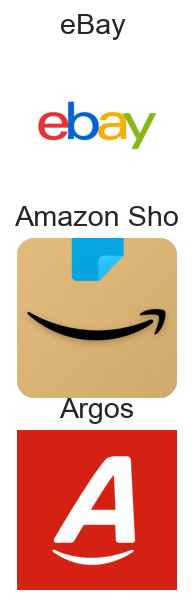

In [30]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Function to format and get the title
def format_title(title):
    sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
    
    if sep_index != -1:
        title = title[:sep_index]
    return title[:10]

# Print logos and titles
fig, axs = plt.subplots(3, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

We'll store the app information for later by converting the JSON objects into a Pandas dataframe and saving the result into a CSV file:

In [31]:
# App Data into Pandas DF and store it
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('apps_all_3.csv', index=None, header=True)

## Scraping App Reviews

In an ideal world, we would get all the reviews. But there are lots of them and we're scraping the data. That wouldn't be very polite. What should we do?

We want:

- Balanced dataset - roughly the same number of reviews for each score (1-5)
- A representative sample of the reviews for each app

We can satisfy the first requirement by using the scraping package option to filter the review score. For the second, we'll sort the reviews by their helpfulness, which are the reviews that Google Play thinks are most important. Just in case, we'll get a subset from the newest, too:

See https://github.com/JoMingyu/google-play-scraper for configurations of function ``google_play_scraper.reviews``.

In [19]:
# This is an example of the function google_play_scraper.reviews
result, continuation_token = reviews(
    'com.fantome.penguinisle',
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    count=1, # defaults to 100
    filter_score_with=5 # defaults to None(means all score)
)
result

[{'reviewId': 'gp:AOqpTOFjVp-OsK8ZUpMsPEeSAjCy2Z2scVryGD6u7IWnnrXv7xaiAulRVS4HBZZtRlRiQDIDpoHyt4s69DQE0J8',
  'userName': 'Aes Velocity',
  'userImage': 'https://play-lh.googleusercontent.com/a-/AOh14GgqZjF_Skc42wPY1OqWeeJZbn57EsfnIUaNBIw',
  'content': "This game helps calm me down when I'm stressed or upset with the music and how easy everything is. My only complaint is how many times you have to watch ads to get rewards it's just annoying. :/ The music in the ads are usually annoying and I normally have my volume all the way up since the music is calming. I'm also not a fan of how long it takes to craft things. Like bro it takes 2 hours just to craft one thing! I'd say mabye 10 minutes is the limit. Anyways a super good game, and I love it!",
  'score': 5,
  'thumbsUpCount': 69,
  'reviewCreatedVersion': '1.31.2',
  'at': datetime.datetime(2021, 3, 3, 23, 46, 7),
  'replyContent': None,
  'repliedAt': None}]

In [44]:
app_reviews = []

# Loop through all the app packages and collect review for each of them
for ap in tqdm(app_packages):
    #for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
        rvs, _ = reviews(
            ap,
            lang='en',
            country='uk',
            sort=sort_order,
            count= 2000,#150 if score == 3 else 200,
            #filter_score_with=score
        )
    for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap

    app_reviews.extend(rvs)

100%|██████████| 3/3 [00:29<00:00,  9.77s/it]


Note that we're adding the app id and sort order to each review. Here's an example for one:

In [45]:
print_json(app_reviews[0])

{
  "appId": "com.ebay.mobile",
  "at": "2021-03-25 22:59:59",
  "content": "Used to love selling on ebay. However now they have introduced the new payments system I think I'll stick to the other sites! Takes 2 days for payments to be processed, PayPal is instant!",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "6.12.1.8",
  "reviewId": "gp:AOqpTOH5kWkNuOR4_0zB-19Wpy9GHd__limtUqCiZb10JZWkQPj5Jj2hxw0Df9bNN21vbAVKZV8v50YbxW8mRg",
  "score": 1,
  "sortOrder": "newest",
  "thumbsUpCount": 0,
  "userImage": "https://play-lh.googleusercontent.com/a-/AOh14Ggf37S_t9hyOqNIfSUd0IFl1UcI7FLwmZSzAqP0mQ",
  "userName": "Stacey Green"
}



`repliedAt` and `replyContent` contain the developer response to the review.

So, how many app reviews did we get?



In [46]:
print("We were able to scrap: ", len(app_reviews), " reviews")

We were able to scrap:  6000  reviews


Let's save the reviews to a CSV file:

In [48]:
# Save app reviews in a CSV format
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews_all_3.csv', index=None, header=True)

In [49]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOH5kWkNuOR4_0zB-19Wpy9GHd__limtUqCiZb1...,Stacey Green,https://play-lh.googleusercontent.com/a-/AOh14...,Used to love selling on ebay. However now they...,1,0,6.12.1.8,2021-03-25 22:59:59,None,NaT,newest,com.ebay.mobile
1,gp:AOqpTOEi2rNuHCiBFNtyGKjwjkNf85NIPLw9ljIdJB1...,Stuart Brennan,https://play-lh.googleusercontent.com/-1FHKgB2...,Good choice,4,0,6.12.1.8,2021-03-25 22:57:50,None,NaT,newest,com.ebay.mobile
2,gp:AOqpTOFFCl0fxvNYLtVB9CyYn_Il9b-jrSOHAlL5bJL...,Nana T,https://play-lh.googleusercontent.com/a-/AOh14...,Great deals everyday. Reliability,5,0,6.12.1.8,2021-03-25 22:55:11,None,NaT,newest,com.ebay.mobile
3,gp:AOqpTOFfEMWjRe7ZkKteE9NsB28ln8lhUl_j7JGov6I...,Vortexingu,https://play-lh.googleusercontent.com/a-/AOh14...,wow good,5,0,None,2021-03-25 22:49:40,None,NaT,newest,com.ebay.mobile
4,gp:AOqpTOFxN8p0rr7RRMuqJ2g11igXoyGh4T6-Lon5m8g...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,it is so user friendly we love it,5,0,6.12.1.8,2021-03-25 22:49:05,None,NaT,newest,com.ebay.mobile


In [5]:
from win32com.shell import shell, shellcon
import pandas as pd
import openpyxl
from openpyxl import load_workbook
import numpy as np
import time
from tkinter import *
from tkinter import ttk
from pandastable import Table, TableModel

class UserInterface(Frame):
    # Launch the df in a pandastable frame
    def __init__(self, parent=None):
        global ui_df
        global pt
        ui_df = pos_df
        self.parent = parent
        Frame.__init__(self)
        self.main = self.master
        #self.main.geometry('800x600+0+0')
        f = Frame(self.main)
        f.grid(column=0, row=1, sticky=(E, W))
        screen_width = f.winfo_screenwidth() * 0.8
        screen_height = f.winfo_screenheight() * 0.7
        self.table = pt = Table(f, dataframe=ui_df, height = screen_height, width = screen_width)
        pt.show()
        return

    def change_df(self, col_val_input):
        #Responds to button
        ui_df['Test col'] = col_val_input
        pt.show()

    def change_df_combo(self, event):
        #Responds to combobox, supposed to filter by 'Sec_type'
        combo_selection = str(combo_box.get())
        ui_df = pos_df[pos_df['Sec_type'] == combo_selection]
        pt.show()

#Create dataframe
pos_data = {'Location' : ['Denver', 'Boulder', 'Phoenix', 'Reno', 'Portland',
'Eugene', 'San Francisco'], 'Sec_type' : ['mbus', 'mbus', 'vmus', 'caus',
'vmus', 'mbus', 'mbus']}
pos_df = pd.DataFrame(data = pos_data)

#Launch Tkinter basics
root = Tk()
root.title("S test...")

mainframe = ttk.Frame(root, padding="3 3 12 12")
mainframe.grid(column=0, row=0, sticky=(N, W, E, S))
mainframe.columnconfigure(0, weight=1)
mainframe.rowconfigure(0, weight=1)
root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)

ui_display = UserInterface(mainframe)

#'Test' button, this works fine
col_val_input = 'It worked!'
test_button = ttk.Button(mainframe, text = 'Test', command= lambda: ui_display.change_df(col_val_input))
test_button.grid(column=0, row=0, sticky=(W))

#Combobox, works to just show choice, but not to filter
combo_choices = ['mbus', 'vmus', 'caus']
choice = StringVar()
combo_box = ttk.Combobox(mainframe, textvariable=choice)
combo_box['values'] = combo_choices
combo_box.grid(column=1, row=0, sticky=(W))
combo_box.bind('<<ComboboxSelected>>', ui_display.change_df_combo)

root.mainloop()